In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from scipy.stats import t
from OLS import OLS
import matplotlib.pyplot as plt

In [35]:
cancer_df = pd.read_csv("../data/cancer_reg_cleaned.csv", index_col=0)

X_matrix = cancer_df.drop("TARGET_deathRate", axis=1)
X_matrix = X_matrix.select_dtypes(include='number')
y = cancer_df["TARGET_deathRate"].to_numpy()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=43)
ones_column = np.ones(len(X_train))
ones_column = ones_column.reshape((len(X_train), 1))
X_train = np.hstack((ones_column, X_train))

ones_column = np.ones(len(X_test))
ones_column = ones_column.reshape((len(X_test), 1))
X_test = np.hstack((ones_column, X_test))

In [37]:
X_matrix

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,173.000000,70,411.600000,48127,43269,18.6,23.111234,33.0,32.2,33.7,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
3,427.000000,202,430.400000,44243,75882,17.1,342.637253,42.8,42.2,43.4,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,350.100000,49955,10321,12.5,0.000000,48.3,47.8,48.9,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
7,146.000000,71,404.000000,40189,20848,17.8,0.000000,51.7,50.8,52.5,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
14,2265.000000,901,440.700000,50083,490945,16.3,462.373586,37.2,35.7,38.7,...,50.6,42.5,36.5,21.4,89.038167,1.827041,2.315986,1.033625,48.188377,5.355836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,1962.667684,7,453.549422,45353,1843,11.4,0.000000,45.7,43.8,49.2,...,52.7,43.9,32.2,9.2,97.960199,0.000000,0.547264,0.995025,57.780612,4.664723
3034,1962.667684,85,453.549422,45180,35788,15.0,1900.078239,38.2,36.5,40.0,...,52.3,46.2,34.4,17.4,87.718617,3.168048,1.610355,1.893068,50.730567,7.404551
3043,1962.667684,43,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192


In [27]:
X_train
y_train

array([187.1, 292.5, 185.1, 205.8, 240.8, 110.4, 190.2, 165.3, 183.2,
       166.1, 148.2, 166.7, 205.1, 188.1, 174.1, 135.2, 263.1, 202.9,
       153.9, 176. , 208.1, 198.4, 179. , 174.2, 144.4, 174.7, 210.8,
       168. , 217.4, 223.4, 293.9, 143.8, 180. , 182.3, 200.8, 201.4,
       174.1, 199.7, 171.5, 151.9, 148.8, 191.4, 198.9, 148.2, 185.4,
       169.9, 208.1, 171.6, 167.8, 149.4, 173.5, 143.2, 176.6, 114.3,
       214.5, 178.7, 212.3, 151.6, 194.8, 172.3, 166.7, 174.4, 197.9,
       155.6, 214.9, 131.8, 177.8, 157.6, 259.5, 172.5, 151.4, 233.2,
       193.3, 173.4, 254.3, 182.1, 171. , 137.3, 178.9, 151.9, 185.1,
       214.4, 185.8, 196.6, 150.9, 206.6, 198.3, 178.8, 171. , 171.8,
       244.9, 108.8, 192.7, 172.5, 198.5, 190.7, 211. , 185.9, 183.6,
       149.1, 202.2, 181.5, 202.2, 136.6, 191.2, 176.4, 138.4, 216.7,
       176.8, 200.2, 158.9, 195.3, 200.9, 168.9, 154.1, 187.2, 185.8,
       151.2, 176.1, 147.1, 197.2, 153.9, 159.2, 175.1, 156.8, 188.4,
       162.4, 160.4,

In [38]:
Regression = OLS()
Regression.fit(X_train, y_train)

In [39]:
Regression.summary()

OLS Regression Results
Name | Coeff Value | C_ste | t | p
Beta0 | 3361.6795020204663 | 1733.3652381914033 | 1.9393947841760397 | 0.053092138401073186
Beta1 | -0.0012013316024955941 | 0.0021303171072877465 | -0.5639214924322192 | 0.5730948698676026
Beta2 | 0.0055339754422355295 | 0.012506285418639745 | 0.44249553380474793 | 0.6583480977994629
Beta3 | 0.19316063563115676 | 0.021502011285826034 | 8.983375232366603 | 0.0
Beta4 | 0.00011019319853079247 | 0.0002572053681229071 | 0.42842495603799374 | 0.6685514048445946
Beta5 | -2.8743813088574137e-06 | 1.6903534935491496e-05 | -0.17004616607276746 | 0.8650519871998581
Beta6 | -0.3280188752146054 | 0.4615694605158039 | -0.710659831887587 | 0.4776715693113056
Beta7 | -0.00033266155871864746 | 0.0028584343587616237 | -0.11637893929555491 | 0.9074053240098465
Beta8 | -0.012448527805906377 | 0.019664884226390827 | -0.6330333635628581 | 0.5270407200878284
Beta9 | -1.5283197740164989 | 0.5589140126360658 | -2.7344452625338938 | 0.006500812401713407

In [40]:
Regression.R2

0.48985895969495274

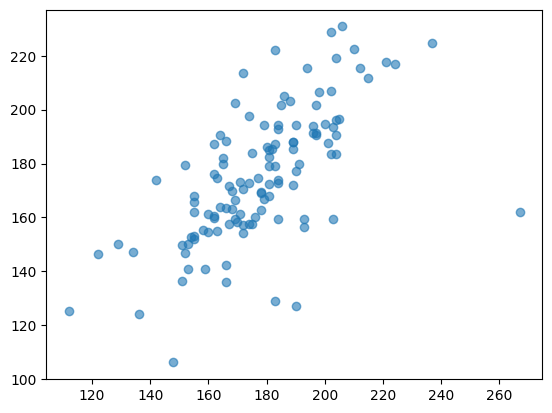

In [41]:
Reg_predicted_vals = Regression.predict(X_test)
y_pred = np.array(list(map(round, Reg_predicted_vals)))
y_real = y_test

plt.scatter(y_pred, y_real, alpha=0.6)
plt.show()